In [60]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
#loading data
loan_data = pd.read_csv('logistic_regression.csv')
raw_data = pd.read_csv('logistic_regression.csv')


In [62]:
loan_data.T

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
grade,B,B,B,A,C,C,A,B,B,C,...,B,A,C,D,B,B,C,B,C,C
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,...,B3,A1,C1,D4,B4,B4,C1,B1,C2,C2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot,Application Architect,Regado Biosciences,...,Retirement Counselor,St Francis Medical Center,Data Center Specialist II,Operations Manager,Michael's Arts & Crafts,licensed bankere,Agent,City Carrier,"Gracon Services, Inc",Internal Revenue Service
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0


In [63]:
loan_data.shape

(396030, 27)

- There are 396030 entries and 27 columns.

In [64]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [65]:
(loan_data.isna().sum()/len(loan_data))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

- There are some null values. First let us drop the columns which are not required. Then drop the entries which are having null values.

- For title and emp_title these are not required as they are many different titles.

In [66]:
loan_data.drop(columns=['title','emp_title'],inplace=True)

- For emp_length, revol_util, mort_acc, pub_rec_bankruptcies are lessthan 10% so we can drop those rows as we are having very large data.

In [67]:
loan_data.dropna(axis=0,inplace=True)

In [68]:
loan_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,340775.000000,340775.000000,340775.000000,3.407750e+05,340775.000000,340775.000000,340775.000000,3.407750e+05,340775.000000,340775.000000,340775.000000,340775.000000
mean,14542.051647,13.799587,445.991927,7.600978e+04,17.692083,11.585574,0.185603,1.622684e+04,54.355115,25.834157,1.805282,0.125508
std,8401.453461,4.509504,252.382032,6.210575e+04,8.154273,5.179239,0.545558,2.114298e+04,23.971283,11.898221,2.143777,0.362347
min,1000.000000,5.320000,21.620000,5.000000e+03,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.640000,263.930000,4.700000e+04,11.600000,8.000000,0.000000,6.302000e+03,36.900000,17.000000,0.000000,0.000000
50%,12500.000000,13.350000,389.030000,6.500000e+04,17.220000,11.000000,0.000000,1.148700e+04,55.300000,24.000000,1.000000,0.000000
75%,20000.000000,16.780000,585.630000,9.000000e+04,23.390000,14.000000,0.000000,2.001550e+04,73.000000,33.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,380.530000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [69]:
loan_data.describe(include='object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
count,340775,340775,340775,340775,340775,340775,340775,340775,340775,340775,340775,340775,340775
unique,2,7,35,11,6,3,58,2,14,662,2,3,338997
top,36 months,B,B3,10+ years,MORTGAGE,Source Verified,Oct-2014,Fully Paid,debt_consolidation,Aug-2001,f,INDIVIDUAL,USNS Johnson\r\nFPO AE 05113
freq,258774,99454,22666,117323,173435,117798,14140,273507,206795,2592,190432,340138,8


In [70]:
loan_data.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='loan_amnt'>

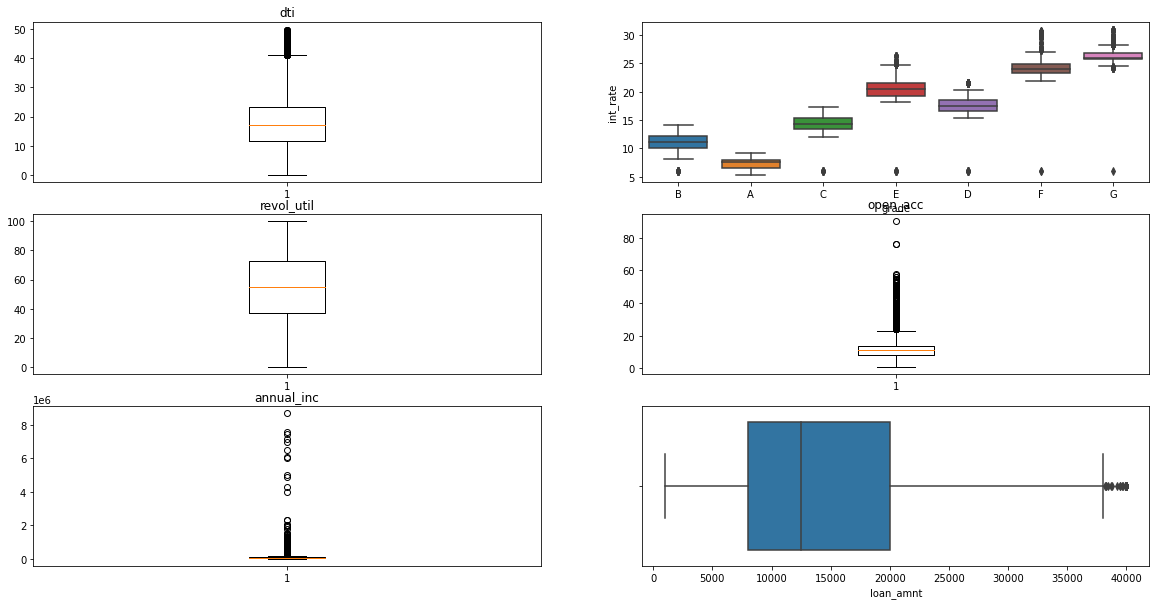

In [71]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.boxplot(loan_data[loan_data['dti']<50]['dti'])
plt.title('dti')
plt.subplot(3,2,2)
sns.boxplot(data=loan_data,x='grade',y='int_rate')
plt.subplot(3,2,3)
plt.boxplot(loan_data[loan_data['revol_util']<=100]['revol_util'])
plt.title('revol_util')
plt.subplot(3,2,4)
plt.boxplot(loan_data['open_acc'])
plt.title('open_acc')
plt.subplot(3,2,5)
plt.boxplot(loan_data['annual_inc'])
plt.title('annual_inc')
plt.subplot(3,2,6)
sns.boxplot(data=loan_data,x='loan_amnt')


- 'revol_util' should be in the range 0-100 since it cannot exceed 100% of utilization the credit limit.
- 'dti' greater than 40 are looking like outliers.
- 'int_rate' are highly dependent on grade and sub_grades. we can remove the grade and sub_grade columns while training the model. There are some outliers for every grade with int_rate lessthan 7 except for A grade.
- loan_amnt are under the range of IQR.
- annual_inc is having many outliers which affect the model predictions.let make the general case annual_inc lets consider >150000 are outliers and remove.
- 'open_acc' >25 are very less and let us consider like outliers.



In [72]:
loan_data = loan_data[(loan_data['revol_util']<=100) & (loan_data['dti']<40)  & (loan_data['open_acc']<25)&(loan_data['annual_inc']<150000) & (loan_data['revol_bal']<50000)]

In [73]:
loan_data= loan_data[((loan_data['int_rate']>7) | (loan_data['grade']=='A'))]

In [74]:
loan_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,5 years,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\r\nWest Williamside,..."
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."


In [75]:
loan_data['home_ownership'].value_counts()

MORTGAGE    150691
RENT        127703
OWN          28272
OTHER           30
NONE            26
ANY              3
Name: home_ownership, dtype: int64

In [76]:
# removing the 'OTHER','NONE','ANY' from home_ownership
some_list=['OTHER','NONE','ANY']
for i in some_list:
    loan_data.drop(loan_data.index[loan_data['home_ownership']==i],inplace=True)

In [77]:
loan_data['application_type'].value_counts()

INDIVIDUAL    306320
JOINT            312
DIRECT_PAY        34
Name: application_type, dtype: int64

In [78]:
some_list=['JOINT','DIRECT_PAY']
for i in some_list:
    loan_data.drop(loan_data.index[loan_data['application_type']==i],inplace=True)

loan_data.drop(columns='application_type',inplace=True)

- **Feature Engineering**

In [79]:
#From adress we are extracting the state code and from 'issue_d' and 'earliest_cr_line' 
#we are calculating no of months gap from earlier_credit_line to present issue date

loan_data['state_code']=(loan_data['address'].str[-5:])
loan_data['months_earlier_Credit_line']=((pd.to_datetime(loan_data['issue_d']) - pd.to_datetime(loan_data['earliest_cr_line'])).dt.days)//30

loan_data.drop(columns=['issue_d','earliest_cr_line','address'],inplace=True)

In [80]:
#Creation of Flags- If value greater than 1.0 then 1 else 0.
loan_data['pub_rec'] = loan_data['pub_rec'].apply(lambda x: 0 if x==0 else 1)
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].apply(lambda x: 0 if x==0 else 1)
loan_data['mort_acc'] = loan_data['mort_acc'].apply(lambda x: 0 if x==0 else 1)

- **Relation with loan_status**

<AxesSubplot:xlabel='state_code', ylabel='count'>

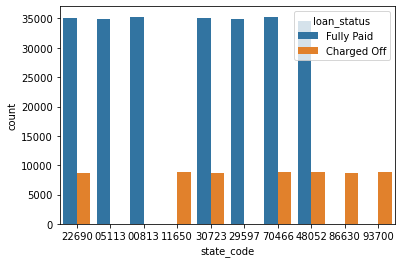

In [81]:
sns.countplot(data=loan_data,x='state_code',hue='loan_status')

In [82]:
loan_data.groupby('state_code')['loan_status'].value_counts()

state_code  loan_status
00813       Fully Paid     35283
05113       Fully Paid     34896
11650       Charged Off     8816
22690       Fully Paid     35043
            Charged Off     8597
29597       Fully Paid     34992
30723       Fully Paid     35094
            Charged Off     8691
48052       Fully Paid     34547
            Charged Off     8817
70466       Fully Paid     35235
            Charged Off     8799
86630       Charged Off     8706
93700       Charged Off     8804
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

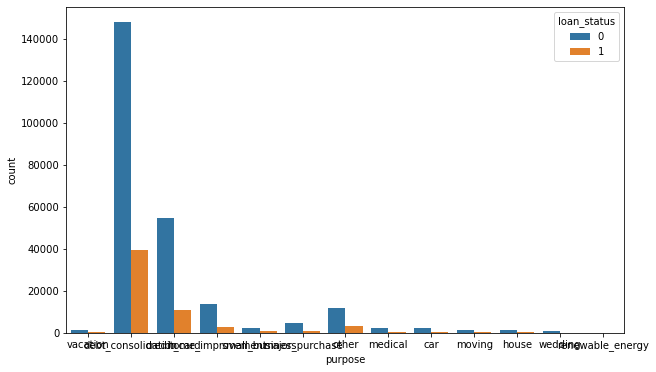

In [227]:
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,x='purpose',hue='loan_status')

In [84]:
loan_data.groupby('purpose')['loan_status'].value_counts()

purpose             loan_status
car                 Fully Paid       2485
                    Charged Off       403
credit_card         Fully Paid      54710
                    Charged Off     11085
debt_consolidation  Fully Paid     147968
                    Charged Off     39432
home_improvement    Fully Paid      13909
                    Charged Off      2975
house               Fully Paid       1188
                    Charged Off       326
major_purchase      Fully Paid       4734
                    Charged Off      1049
medical             Fully Paid       2330
                    Charged Off       651
moving              Fully Paid       1509
                    Charged Off       496
other               Fully Paid      11637
                    Charged Off      3300
renewable_energy    Fully Paid        157
                    Charged Off        53
small_business      Fully Paid       2217
                    Charged Off       981
vacation            Fully Paid       1482
  

<AxesSubplot:xlabel='term', ylabel='count'>

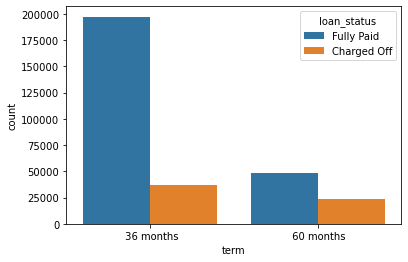

In [85]:
sns.countplot(data=loan_data,x='term',hue='loan_status')

- For 36 months repayment terms the percent of fully paid people are high compared to 60 months.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

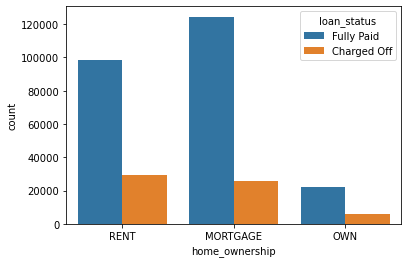

In [86]:
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')

- **Dealing Categorical features**

In [87]:
#replacing the object type of emp_length to value
dic = {
    '10+ years':10,'4 years':4, '< 1 year':0,'6 years':6,'9 years':9,
    '2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1
}
loan_data.replace({'emp_length':dic},inplace=True)

In [88]:
loan_data['term']= loan_data['term'].map({' 36 months':0,' 60 months':1})
loan_data['verification_status']= loan_data['verification_status'].map({'Not Verified':0, 'Source Verified':1, 'Verified':2})
loan_data['initial_list_status']=loan_data['initial_list_status'].map({'w':1, 'f':0})
loan_data['loan_status']=loan_data['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

<AxesSubplot:>

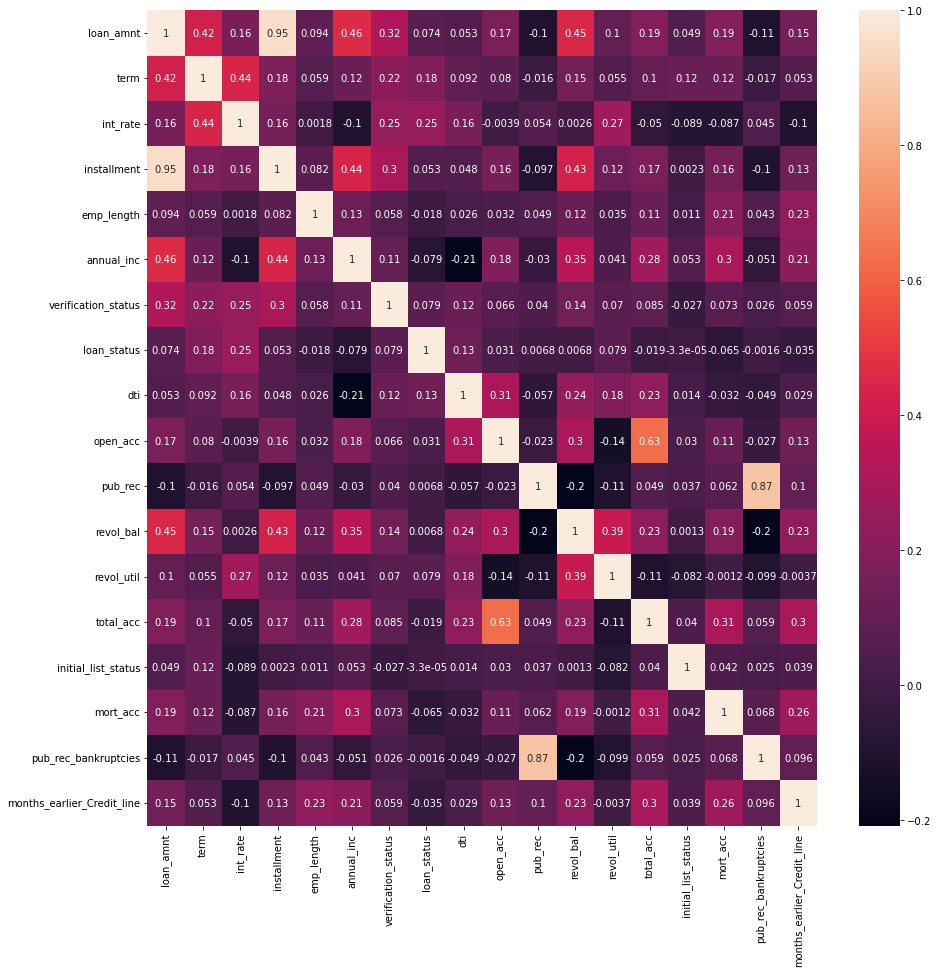

In [89]:
plt.figure(figsize=(15,15))
sns.heatmap(data=loan_data.corr(),annot=True)

In [90]:
loan_data.T

,0,1,2,3,4,6,7,8,9,10,...,396018,396019,396020,396022,396023,396024,396025,396026,396027,396028
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,18000.0,13000.0,18900.0,26300.0,10000.0,...,15000.0,15000.0,10000.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0
term,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
int_rate,11.44,11.99,10.49,6.49,17.27,5.32,11.14,10.99,16.29,13.11,...,9.67,12.49,9.76,12.29,18.92,13.11,10.99,12.29,9.99,15.31
installment,329.48,265.68,506.97,220.65,609.33,542.07,426.47,410.84,928.4,337.47,...,481.69,501.74,321.55,400.24,805.55,202.49,217.38,700.42,161.32,503.02
grade,B,B,B,A,C,A,B,B,C,B,...,B,B,B,C,D,B,B,C,B,C
sub_grade,B4,B5,B3,A2,C5,A1,B2,B3,C5,B4,...,B1,B5,B3,C1,D4,B4,B4,C1,B1,C2
emp_length,10,4,0,6,9,2,10,10,3,2,...,10,10,10,1,10,5,2,5,10,10
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,RENT,...,MORTGAGE,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,125000.0,46000.0,103000.0,115000.0,95000.0,...,118450.0,50000.0,40000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0
verification_status,0,0,1,0,2,1,0,2,2,2,...,1,1,0,1,0,0,1,1,2,2


In [91]:
loan_data = pd.get_dummies(data=loan_data,drop_first=True,prefix='home',columns=['home_ownership'])

- **Train Test Split**

In [92]:
from sklearn.model_selection import train_test_split

In [175]:
X= loan_data.drop(columns=['grade','loan_status'])
y= loan_data['loan_status']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [178]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'state_code', 'months_earlier_Credit_line', 'home_OWN', 'home_RENT'],
      dtype='object')

- **Scaling**

In [179]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train[['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'open_acc', 'revol_bal','revol_util', 'total_acc',
        'months_earlier_Credit_line']]= std_scaler.fit_transform(X_train[['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc',
        'dti', 'open_acc', 'revol_bal','revol_util', 'total_acc','months_earlier_Credit_line']])

c:\Users\vemul\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


- **Target Encoding for 'pupose' and 'state_code'**

In [180]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
X_train[['purpose','state_code','sub_grade']]=tenc.fit_transform(X_train[['purpose','state_code','sub_grade']],y_train)


c:\Users\vemul\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Users\vemul\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
c:\Users\vemul\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [181]:
X_train.T

,5910,388074,270783,42745,360640,177969,50778,282399,66953,87442,...,228325,27936,216383,379298,296895,27530,151990,94718,345634,165511
loan_amnt,-0.635638,1.289963,0.377837,-0.838332,1.289963,0.783226,-0.990354,-1.208884,1.416648,-1.547764,...,-0.736985,0.149805,-0.990354,-1.110704,-0.546959,1.441985,-0.793993,-0.534290,-0.040221,0.149805
term,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
int_rate,-1.605909,0.767553,-0.348580,-0.348580,-0.079632,-1.088185,-0.326167,1.377167,1.040983,0.032429,...,-0.415816,0.256552,0.834790,0.877373,-0.386680,1.316654,0.657732,2.141426,0.547912,0.254311
installment,-0.654459,0.745184,0.576897,-0.783116,0.541983,0.897882,-0.951912,-1.128397,0.921711,-1.570903,...,-0.674677,-0.287728,-0.887265,-1.030237,-0.460559,1.016048,-0.663293,-0.216200,-0.399862,0.404873
sub_grade,0.056099,0.245341,0.170408,0.170408,0.199286,0.094116,0.170408,0.401542,0.286778,0.238985,...,0.121019,0.245341,0.324888,0.265549,0.121019,0.328699,0.245341,0.414950,0.286778,0.222135
emp_length,0.823382,-1.649734,-0.825362,-1.649734,1.098172,-1.649734,0.823382,1.098172,1.098172,-0.825362,...,-1.100153,-1.100153,-0.550572,1.098172,-0.825362,0.273800,-1.374944,1.098172,0.548591,1.098172
annual_inc,-0.310242,2.658856,-0.020574,-0.744744,0.920847,1.210515,-0.310242,-0.382659,-0.092991,-1.251664,...,-0.998204,0.305303,0.269094,-0.817162,0.341511,-0.056783,-1.432706,0.975160,-0.636119,0.776013
verification_status,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000
purpose,0.167104,0.167104,0.211177,0.167104,0.219091,0.211177,0.211177,0.224014,0.211177,0.211177,...,0.167104,0.211177,0.211177,0.312134,0.167104,0.211177,0.248031,0.312134,0.167104,0.211177
dti,0.037682,-0.316528,-0.867800,-1.006242,0.852118,0.073852,-0.022184,-0.725617,1.666553,-0.077062,...,1.403389,2.088114,0.184854,-1.831902,-1.808205,-0.131940,1.203834,-0.053365,1.106551,-1.293102


In [182]:
# Scaling test data 
X_test[['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'open_acc', 'revol_bal','revol_util', 'total_acc',
        'months_earlier_Credit_line']]= std_scaler.transform(X_test[['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'open_acc', 'revol_bal','revol_util', 'total_acc',
        'months_earlier_Credit_line']])


X_test[['purpose','state_code','sub_grade']]=tenc.transform(X_test[['purpose','state_code','sub_grade']])


c:\Users\vemul\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\vemul\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


- **Logistic Regression Model**

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
log_reg = LogisticRegression(class_weight={0:1,1:4})

log_reg.fit(X_train,y_train)

c:\Users\vemul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 4})

In [185]:
y_pred=log_reg.predict(X_test)

In [186]:
log_reg.score(X_test,y_test)

0.8128493079132932

In [187]:
log_reg.coef_

array([[-2.03159162e-02,  5.34598210e-01, -4.74885831e-01,
         1.41869641e-01,  8.53387490e+00, -1.95367251e-02,
        -1.87149456e-01,  1.67469599e-02,  2.11579938e+00,
         1.72548773e-01,  1.35691029e-01,  1.41070934e-01,
        -8.31497677e-02,  1.28828734e-01, -1.15227332e-01,
        -5.73881010e-02, -4.45855501e-02, -1.37244369e-01,
         2.89116031e+01,  8.55102660e-03,  1.30497297e-01,
         2.51463773e-01]])

In [188]:
pd.DataFrame({'coeff':log_reg.coef_.reshape(-1)},index=X.columns)

,coeff
loan_amnt,-0.020316
term,0.534598
int_rate,-0.474886
installment,0.141870
sub_grade,8.533875
emp_length,-0.019537
annual_inc,-0.187149
verification_status,0.016747
purpose,2.115799
dti,0.172549


In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, ConfusionMatrixDisplay, f1_score, roc_auc_score, auc,recall_score,roc_curve, classification_report

In [190]:
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[50245, 11129],
       [ 3203, 12003]], dtype=int64)

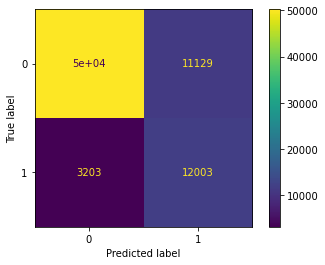

In [191]:
ConfusionMatrixDisplay(cm).plot()

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     61374
           1       0.51      0.79      0.62     15206

    accuracy                           0.81     76580
   macro avg       0.72      0.80      0.74     76580
weighted avg       0.85      0.81      0.82     76580



In [193]:
roc_auc_score(y_test,y_pred)

0.8040143033275764

Text(0, 0.5, 'a')

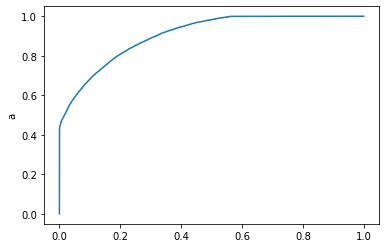

In [194]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('a')

(0.0, 1.0)

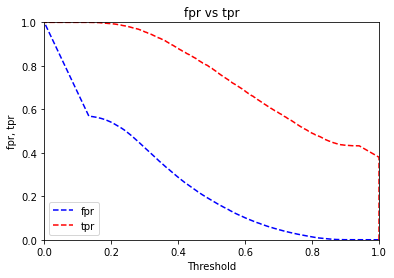

In [195]:
plt.title("fpr vs tpr")
plt.plot(thresholds, fpr[: ], "b--", label="fpr")
plt.plot(thresholds, tpr[: ], "r--", label="tpr")
plt.ylabel("fpr, tpr")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.xlim([0,1])

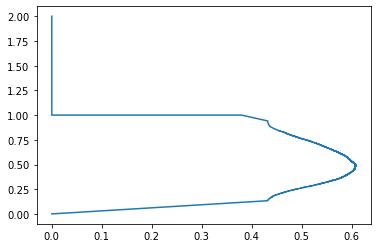

In [196]:
plt.plot((tpr-fpr),thresholds)

In [197]:
optimal_idx = np.argmax(tpr - fpr)
thresholds[optimal_idx]

0.48747831543891834

- we get optimal threshold of prob at max (tpr-fpr). we got at 0.487 it is almost near to the default threshold 0.5. So we are sticking with the default threshold.

In [133]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba ) 

No handles with labels found to put in legend.


(0.0, 1.0)

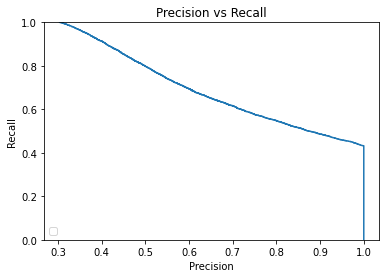

In [134]:
plt.title("Precision vs Recall")
plt.plot(precision,recall)
plt.ylabel("Recall")
plt.xlabel("Precision")
plt.legend(loc="lower left")
plt.ylim([0,1])

(0.0, 1.0)

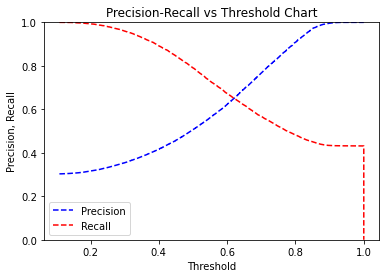

In [135]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

**Tradeoff between false_positive and false_negative**
- If we have less false positive then there is less chance to lose out an opportunity to finance.
- If we have less false negative then there is a loss of not paying of loans.
- In balance to these we came up with optimal between false_positive and false_negative as we have done above.
- If we want to have very minimal false positive we can look at more precision for particular threshold of probability. Similarly if we want to have minimal false negative then we look at more recall for particular threshold of probability.

- **Questionnaire**

**1. What percentage of customers have fully paid their Loan Amount?**

[]

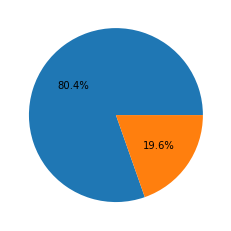

In [148]:
plt.pie(raw_data['loan_status'].value_counts()/len(raw_data)*100,autopct='%1.1f%%')
plt.plot()

In [142]:
(raw_data['loan_status'].value_counts()/len(raw_data)*100)[0]

80.38709188697825

- percentage of customers have fully paid their Loan Amount is 80.387 %

**2. Comment about the correlation between Loan Amount and Installment features.**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

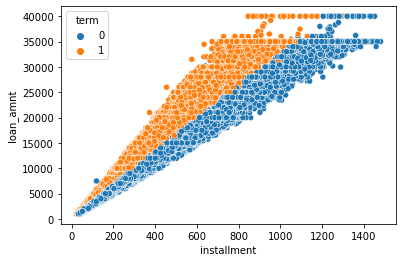

In [145]:
sns.scatterplot(data=loan_data,x='installment',y='loan_amnt',hue='term')

# 0 : 36 months term
# 1 : 64 months term

- we observe that if we choose large term the installment decrease. If the term is less then installment will increase for any given loan amount.

**3. The majority of people have home ownership**

In [151]:
raw_data['home_ownership'].value_counts()/len(raw_data)*100

MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: home_ownership, dtype: float64

- The majority of people have home ownership as MORTGAGE around 50%

**4. People with grades ‘A’ are more likely to fully pay their loan**

In [153]:
raw_data[raw_data['grade']=='A']['loan_status'].value_counts()/len(raw_data[raw_data['grade']=='A'])*100

Fully Paid     93.712122
Charged Off     6.287878
Name: loan_status, dtype: float64

In [219]:
df=(raw_data.groupby('grade')['loan_status'].value_counts().reset_index(name='count'))

In [225]:
df['percent'] = (100*df['count']/df.groupby('grade')['count'].transform('sum'))

In [226]:
df

,grade,loan_status,count,percent
0,A,Fully Paid,60151,93.712122
1,A,Charged Off,4036,6.287878
2,B,Fully Paid,101431,87.426951
3,B,Charged Off,14587,12.573049
4,C,Fully Paid,83538,78.819100
5,C,Charged Off,22449,21.180900
6,D,Fully Paid,45186,71.132171
7,D,Charged Off,18338,28.867829
8,E,Fully Paid,19723,62.636560
9,E,Charged Off,11765,37.363440


- True, Compared to other grades A grade people are more likely to fully paid.

**5. The top 2 afforded job titles**

In [201]:
#lower case the string
raw_data['emp_title']= raw_data['emp_title'].str.lower()

In [204]:
raw_data.groupby('emp_title')['loan_status'].value_counts().sort_values(ascending=False)

emp_title                              loan_status
teacher                                Fully Paid     4355
manager                                Fully Paid     4320
registered nurse                       Fully Paid     2095
supervisor                             Fully Paid     1968
sales                                  Fully Paid     1770
                                                      ... 
general atomics asi                    Fully Paid        1
general atomics, aeronautical systems  Fully Paid        1
general atomocs                        Fully Paid        1
general attorney                       Fully Paid        1
​license compliance investigator       Fully Paid        1
Name: loan_status, Length: 165882, dtype: int64

In [199]:
(raw_data['emp_title'].str.lower()).value_counts()

manager                      5637
teacher                      5430
registered nurse             2627
supervisor                   2591
sales                        2382
                             ... 
director of public events       1
amsec llc                       1
simon  and  schuster            1
coating specialist iii          1
gracon services, inc            1
Name: emp_title, Length: 154014, dtype: int64

- The top 2 afforded job titles are teacher and manager.

**6. Thinking from a bank's perspective, which metric should our primary focus be on ?**

- ROC AUC doesn't work well for imbalanced data.
- Precision and Recall should be optimised as false negative and false positive both are important in our case.
- F1 score will be the correct metric so that should be our primary focus.

**7. How does the gap in precision and recall affect the bank ?**

- Gap of precision and recall should be low for good model. If the precision and recall is low the defaulters and the opportunity to finance more individuals is balanced.


**8. Which were the features that heavily affected the outcome**

In [200]:
pd.DataFrame({'coeff':log_reg.coef_.reshape(-1)},index=X.columns)

,coeff
loan_amnt,-0.020316
term,0.534598
int_rate,-0.474886
installment,0.141870
sub_grade,8.533875
emp_length,-0.019537
annual_inc,-0.187149
verification_status,0.016747
purpose,2.115799
dti,0.172549


- The State_code and the grade are the features that heavily affected the outcome.

**9. Will the results be affected by geographical location**

- Yes, as you observed in the above the state_code is the feature that is heavily affected the outcome.

<AxesSubplot:xlabel='state_code', ylabel='count'>

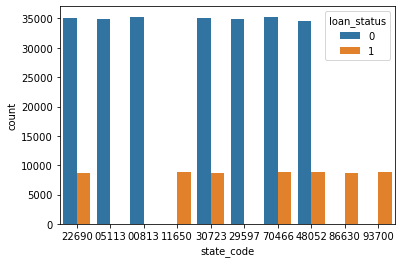

In [228]:
sns.countplot(data=loan_data,x='state_code',hue='loan_status')

- As we observe there are some states there are fully paid people and there are some states where there are only Charged off people.

#### **Actionable Insights & Recommendations:**

- credit line can be increased for the people who are from the states with state_code 05113, 00813, 29597 as they are 100% fully paid. 
- For the state_code's 11650, 86630, 93700 all the people are charged off so don't try to give loans.
- For 36 months repayment terms the percent of fully paid people are high compared to 60 months.
- Interest rate is also affecting the loan status. Higher interest rate is making high chance of charged off.
